# Geo data

This notebook shows how to work with geographic spatial datasets.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sys
import os

os.chdir("../../..")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

## Setup Geo spatial area

In `yaml` settings file, when assigning the `world` parameter of a `nature` module as a path of map, module will automatically read this map as the "basemap".

```yaml
world: data/mean_prec.tif
```


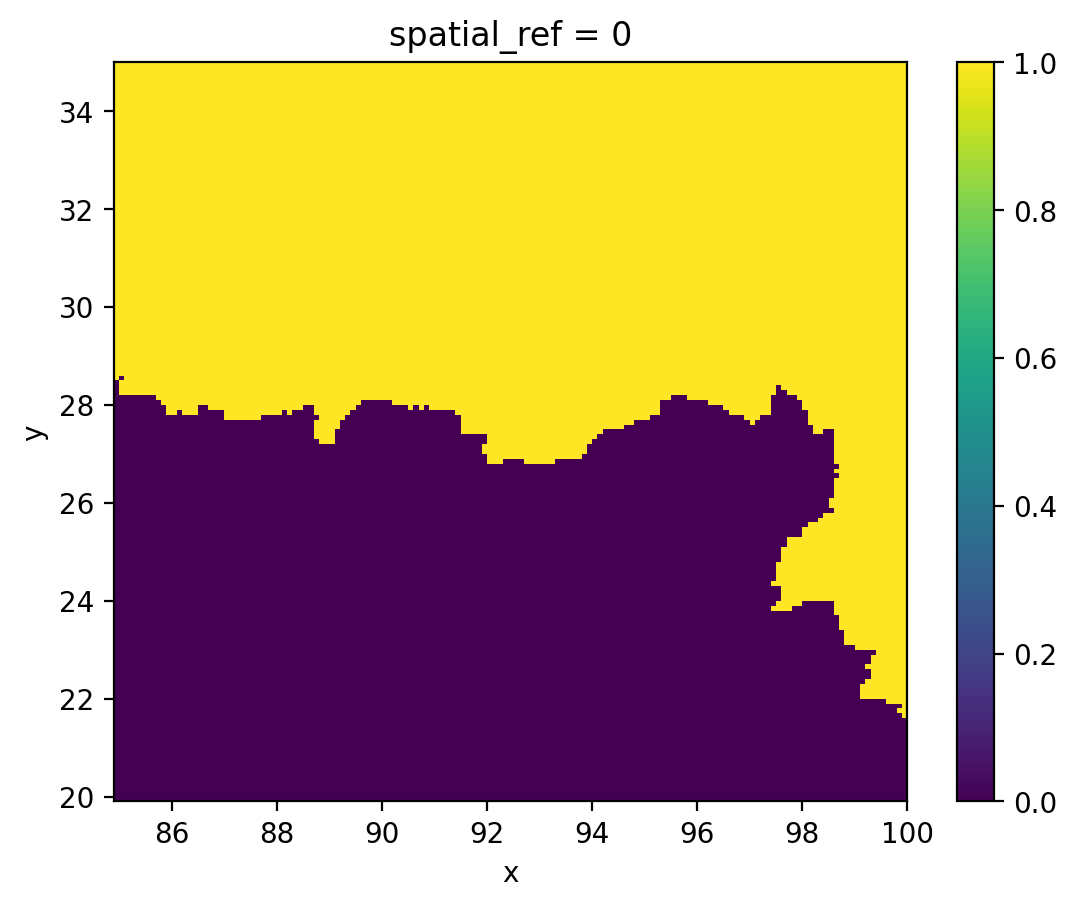

In [2]:
from abses import MainModel

# as same as read this from `.yaml` file.
parameters = {'nature': {'world': r"data/clipped.tif"}}

model = MainModel(name='geo testing', base='tests', parameters=parameters)

model.nature.accessible.plot()


## Reproject spatial datasets

After a model assigned spatial area and projection, the following spatial datasets are all automatically re-projected for matching. It's a method of `Geo` module.

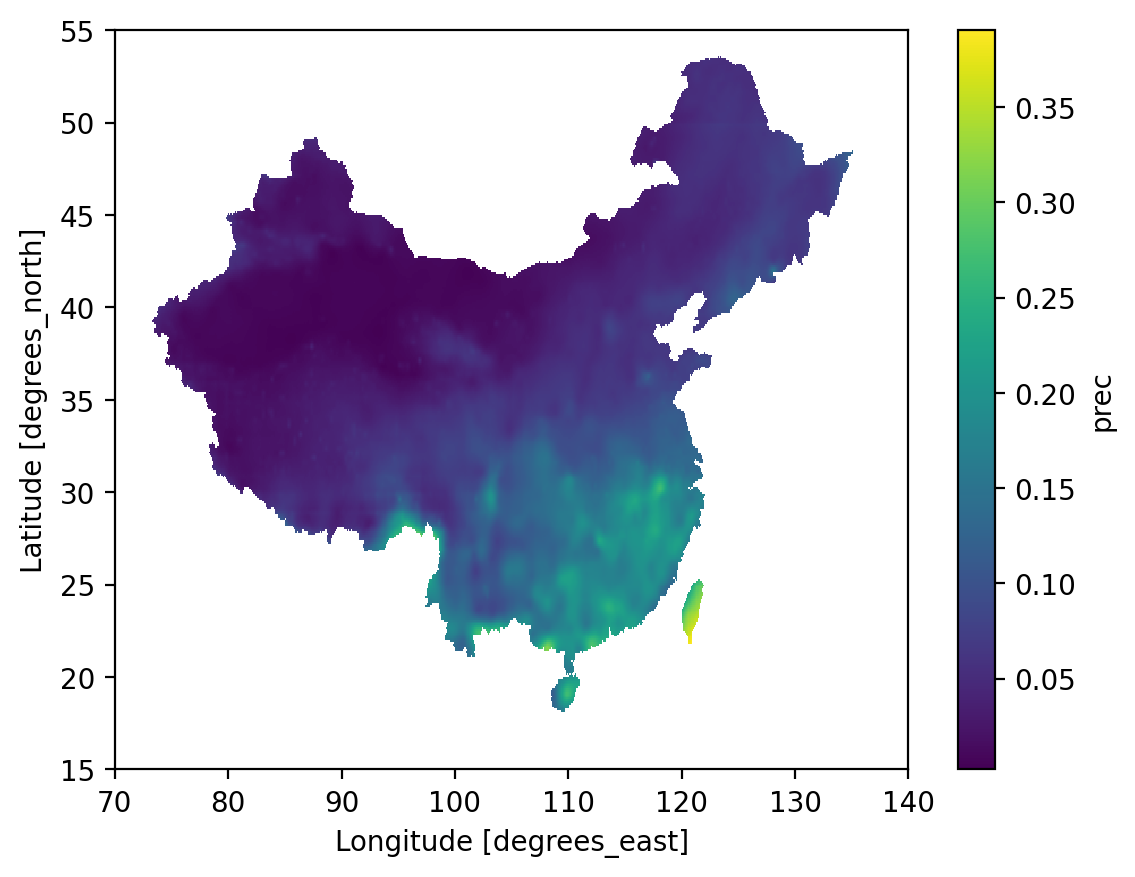

In [3]:
import xarray

nc = xarray.open_dataarray("data/prec_CMFD_V0106_B-01_01mo_010deg_197901-201812.nc")
nc.mean('time').plot()

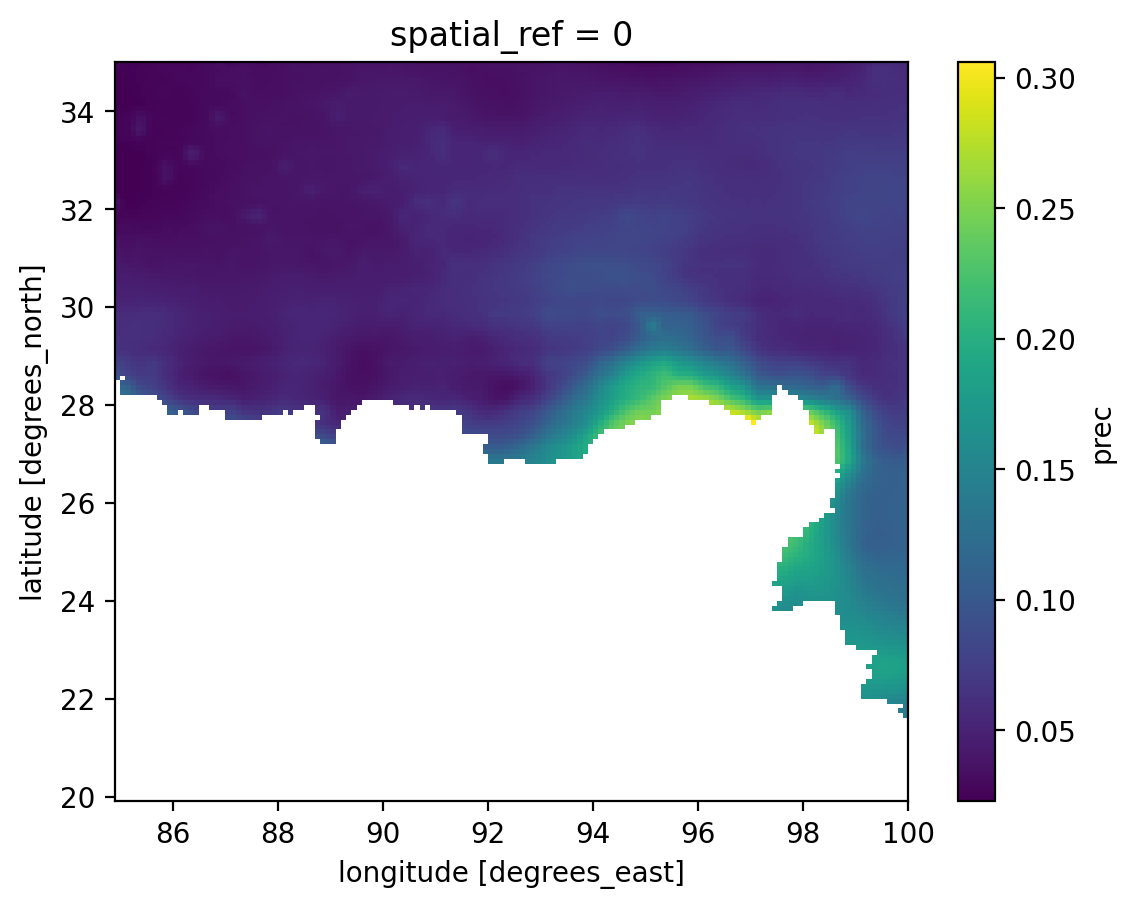

In [4]:
xda = model.nature.geo.clip_match(nc)
xda.mean('time').plot()

## Read `.nc` dataset

Alternatively, data can be added as a patch variable directly from the file path. If this is done, the slice within the dataset closest to the current model simulation date will be automatically selected.

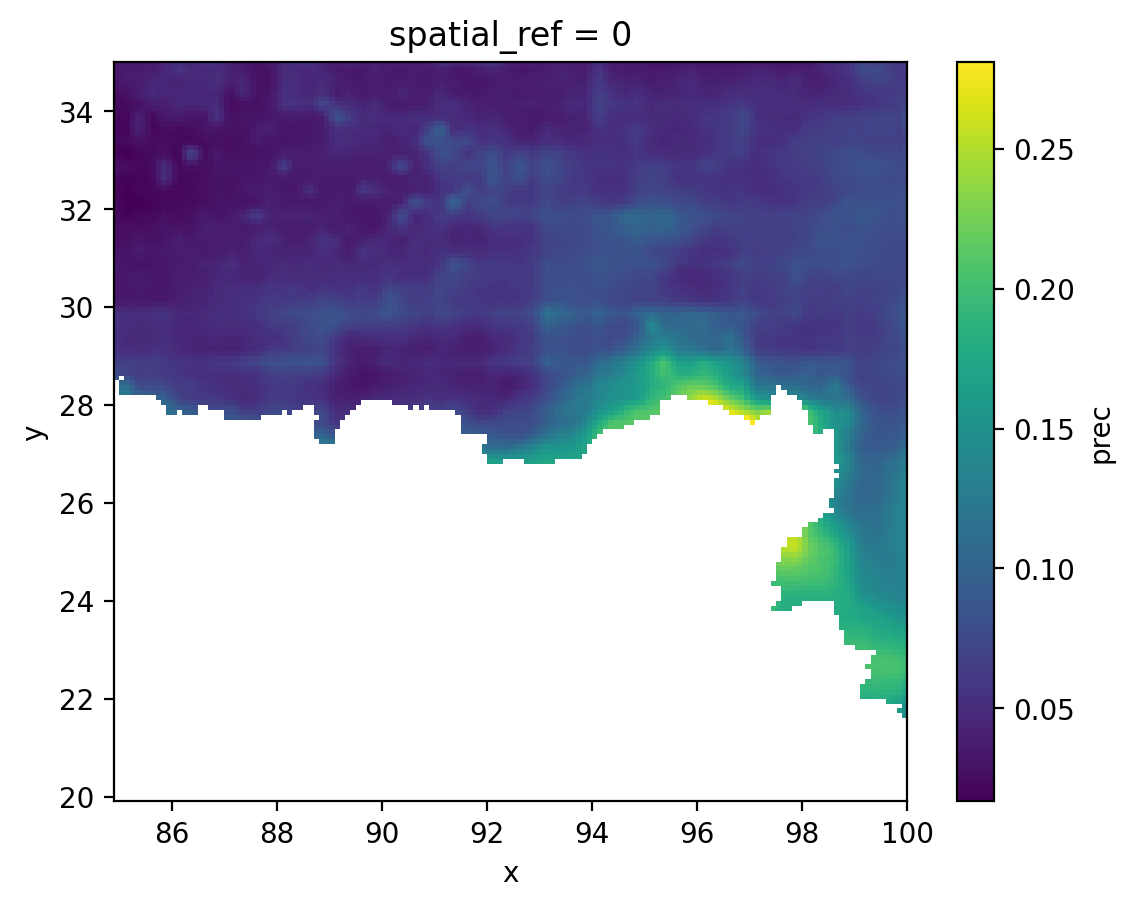

In [5]:
path = "data/prec_CMFD_V0106_B-01_01mo_010deg_197901-201812.nc"
patch = model.nature.read_patch(path, name='prec')
patch.xda.plot()

Only spatial data added as variables can be selected and altered by other modules (e.g. `Actors`).

In [6]:
from abses import Actor


actors = model.agents.create(Actor, 5)
model.nature.add_agents(actors)

# Precipitation rate of those actors' locations
actors.loc('prec')

[0.037709873, 0.020417213, 0.2766676, 0.029792786, 0.03145949]

`Patch` variable is the core data structure in `ABSESpy`, which is subclassed from `np.ndarray`. It is much faster than `xarray.DataArray` in normal calculations, but can be converted into `xarray.DataArray` with spatial information (supported by package `rioxarray`) because this GIS information is not changed throughout the simulation.

The following user guide shows more examples of `Patch` object manipulations.